In [20]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator

In [21]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [22]:
#reading data from csv

probabilities = pd.read_csv('df_probabilities_100.csv')
probabilities = probabilities['0'].to_list()

g_res = pd.read_csv('df_g_res_100.csv')
generation = g_res.drop('Unnamed: 0', axis = 1).loc[0].to_list()

In [23]:
#setting demand and prices

demand = 10
p_lt = 1
p_rt = 3

In [24]:
model = gp.Model()

setup = GurobiSolution(model, 
                        probabilities = probabilities,
                        generation = generation)

In [25]:
setup.build_centralized_2stage_model(demand=demand,
                                        p_lt=p_lt,
                                        p_rt = p_rt)

In [26]:
model.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 100 rows, 101 columns and 200 nonzeros
Model fingerprint: 0xef05579f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-04, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Presolve time: 0.01s
Presolved: 100 rows, 101 columns, 200 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.255225e+02   0.000000e+00      0s
       3    9.9639126e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.963912561e+00


In [27]:
model.getVars()

[<gurobi.Var long term purchase (value 9.8891)>,
 <gurobi.Var real time purchase[0] (value 0.11090000000000089)>,
 <gurobi.Var real time purchase[1] (value 0.05545000000000044)>,
 <gurobi.Var real time purchase[2] (value 0.0)>,
 <gurobi.Var real time purchase[3] (value 0.0)>,
 <gurobi.Var real time purchase[4] (value 0.0)>,
 <gurobi.Var real time purchase[5] (value 0.0)>,
 <gurobi.Var real time purchase[6] (value 0.0)>,
 <gurobi.Var real time purchase[7] (value 0.0)>,
 <gurobi.Var real time purchase[8] (value 0.0)>,
 <gurobi.Var real time purchase[9] (value 0.0)>,
 <gurobi.Var real time purchase[10] (value 0.0)>,
 <gurobi.Var real time purchase[11] (value 0.0)>,
 <gurobi.Var real time purchase[12] (value 0.0)>,
 <gurobi.Var real time purchase[13] (value 0.0)>,
 <gurobi.Var real time purchase[14] (value 0.0)>,
 <gurobi.Var real time purchase[15] (value 0.0)>,
 <gurobi.Var real time purchase[16] (value 0.0)>,
 <gurobi.Var real time purchase[17] (value 0.0)>,
 <gurobi.Var real time purcha

In [28]:
model.display()

Minimize
<gurobi.LinExpr: long term purchase + 0.5056459220719818 real time purchase[0]
+ 0.3378977159029185 real time purchase[1] + 0.41473942997627283 real time purchase[2]
+ 0.22169177553529051 real time purchase[3] + 0.1350733255195677 real time purchase[4]
+ 0.0909922529373087 real time purchase[5] + 0.0962236642748919 real time purchase[6]
+ 0.0619193276350017 real time purchase[7] + 0.0338755324318914 real time purchase[8]
+ 0.0285583602527085 real time purchase[9] + 0.028043795203109997 real time purchase[10]
+ 0.0217832537663301 real time purchase[11] + 0.0267573825791142 real time purchase[12]
+ 0.0249564049055199 real time purchase[13] + 0.0277865126783109 real time purchase[14]
+ 0.026585860895914804 real time purchase[15]
+ 0.0219547754495295 real time purchase[16] + 0.0242703181727223 real time purchase[17]
+ 0.0235842314399244 real time purchase[18] + 0.0204968411423343 real time purchase[19]
+ 0.0194677110431376 real time purchase[20] + 0.0223835796575283 real time purc

In [29]:
test_1 = np.random.normal(20, 5, 100000)
test_2 = np.random.normal(40, 9, 100000)
test_3 = np.random.normal(60, 12, 100000)

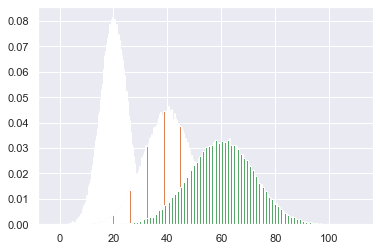

In [30]:
probas_1, values_1, _ = plt.hist(test_1, bins=200, density=True)
probas_2, values_2, _ = plt.hist(test_2, bins=200, density=True)
probas_3, values_3, _ = plt.hist(test_3, bins=200, density=True)

probas_1 = probas_1 / probas_1.sum()
probas_2 = probas_2 / probas_2.sum()
probas_3 = probas_3 / probas_3.sum()

In [31]:
a_1 = stats.rv_histogram([probas_1, values_1])
a_2 = stats.rv_histogram([probas_2, values_2])
a_3 = stats.rv_histogram([probas_3, values_3])

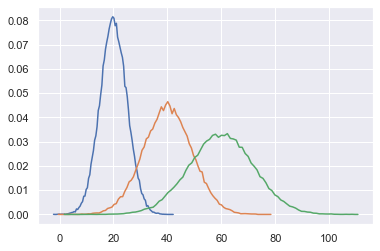

In [32]:
fig, ax = plt.subplots()

ax.plot(np.linspace(*a_1.support(), 100), a_1.pdf(np.linspace(*a_1.support(), 100)))
ax.plot(np.linspace(*a_2.support(), 100), a_2.pdf(np.linspace(*a_2.support(), 100)))
ax.plot(np.linspace(*a_3.support(), 100), a_3.pdf(np.linspace(*a_3.support(), 100)))

fig;

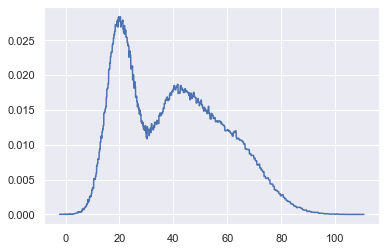

In [33]:
supp = np.sort(np.concatenate([np.linspace(*a_1.support(), 1000), np.linspace(*a_2.support(), 1000), np.linspace(*a_3.support(), 1000)]))

plt.plot(supp, 0.3333 * (a_1.pdf(supp) + a_2.pdf(supp) + a_3.pdf(supp)))

In [34]:
plt.plot(supp, new_rv.pdf(supp))

NameError: name 'new_rv' is not defined

In [ ]:
a_1 = [probas_1, values_1]
a_2 = [probas_2, values_2]
a_3 = [probas_3, values_3]

In [35]:
seller_1 = Seller(probas_1, values_1, wager=100)
seller_2 = Seller(probas_2, values_2, wager=100)
seller_3 = Seller(probas_3, values_3, wager=100)

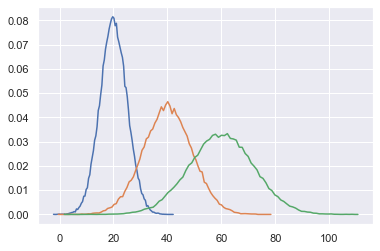

In [36]:
sellers = [seller_1, seller_2, seller_3]

MarketOperator.plot_forecasts(sellers)

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.rv_histogram object at 0x14fae7640>>

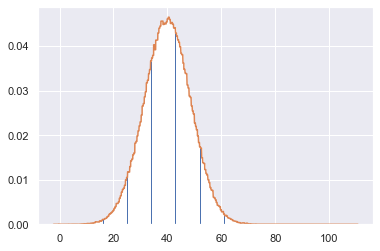

In [39]:
MarketOperator.aggregation(sellers, type = 'QA', plot = True)

In [20]:
def distribution(probabilities, values):
    dist = stats.rv_histogram([probabilities, values])

    return dist

In [21]:
b_1 = distribution(*a_1)
b_2 = distribution(*a_2)
b_3 = distribution(*a_3)

In [22]:
quantiles = np.linspace(0, 1, 3000)

In [23]:
ppf_sum = b_1.ppf(quantiles) + b_2.ppf(quantiles) + b_3.ppf(quantiles)

def func_1(*quantile):
    ppf_total = 0.33*(b_1.ppf(*quantile) + b_2.ppf(*quantile) + b_3.ppf(*quantile))
    return ppf_total

In [24]:
from scipy.stats import rv_continuous

class my_rv(rv_continuous):
    def _ppf(self, x):
        return func_1(x)

In [25]:
rv = my_rv()

new_data = rv.rvs(size=1000000)


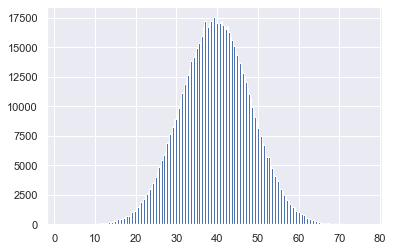

In [26]:
probas_res, values_res, _ = plt.hist(new_data, bins = 200)

In [27]:
new_rv = stats.rv_histogram([probas_res, values_res])

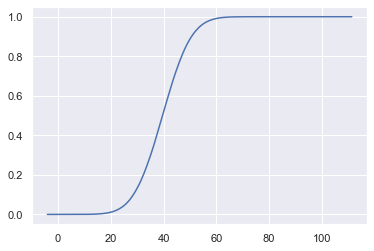

In [28]:
plt.plot(supp, new_rv.cdf(supp))

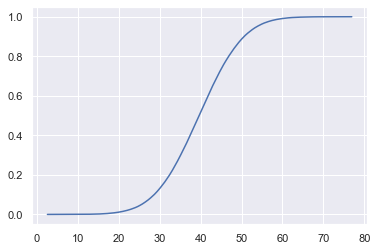

In [98]:
plt.plot(func_1(quantiles), quantiles)

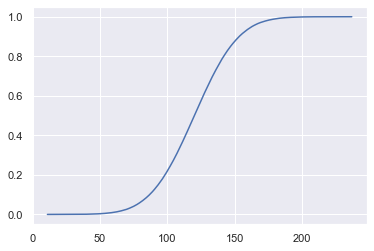

In [57]:
plt.plot(ppf_sum, quantiles);

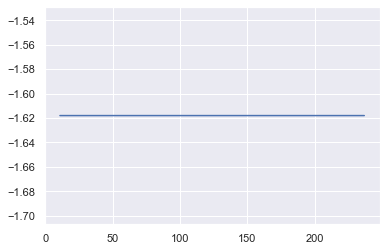

In [35]:
plt.plot(ppf_sum, cdf)

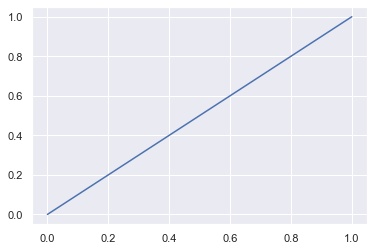

In [346]:
plt.plot(quantiles, b_1.cdf(b_1.ppf(quantiles)))